In [4]:
import numpy as np # indicated numbers and arrays
import tensorflow as tf # build and train AI models
from tensorflow.keras import layers # build AI layers
import matplotlib.pyplot as plt # used for drawing chart, images

print("Tensorflow:", tf.__version__)
print("keras (vias tf.keras):", tf.keras.__version__)

Tensorflow: 2.19.0
keras (vias tf.keras): 3.10.0


In [3]:
# Normalization - make data simple for the model by converting data to 0 to 1 instead of 0 to 255
(x_train, _), _ = tf.keras.datasets.mnist.load_data() # 28x28 grayscale images
x_train = (x_train.astype("float32") - 127.5) / 127.5
x_train = np.expand_dims(x_train, -1) # (60000, 28, 28, 1)
train_ds = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(256)
# 0-255 0 - black, 255 - white

In [5]:
# noise -> fake image
G = tf.keras.Sequential([
    layers.Dense(128, input_shape=(100,), activation="relu"),
    layers.Dense(28*28, activation="tanh"),
    layers.Reshape((28, 28, 1))
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# identify real image or fake image
D = tf.keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Loss + optimizers
bce = tf.keras.losses.BinaryCrossentropy()
d_opt = tf.keras.optimizers.Adam(1e-4)
g_opt = tf.keras.optimizers.Adam(1e-4)

In [8]:
# Train step
@tf.function
def train_step(real_images):
    noise = tf.random.normal([real_images.shape[0], 100])
    fake_image = G(noise)
    # train D
    with tf.GradientTape() as d_tape:
        real_output = D(real_images)
        fake_output = D(fake_image)
        d_loss = bce(tf.ones_like(real_output), real_output) + bce(tf.zeros_like(fake_output), fake_output)

    d_grads = d_tape.gradient(d_loss, D.trainable_weights)
    d_opt.apply_gradients(zip(d_grads, D.trainable_weights))


    # Train G
    noise = tf.random.normal([real_images.shape[0], 100])
    with tf.GradientTape() as g_tape:
        fake_image = G(noise)
        fake_output = D(fake_image)
        g_loss = bce(tf.ones_like(fake_output), fake_output)

    g_grads = g_tape.gradient(g_loss, G.trainable_weights)
    g_opt.apply_gradients(zip(g_grads, G.trainable_weights))

    return d_loss, g_loss


Epoch 1, D loss: 0.346, G loss: 2.092
Epoch 2, D loss: 0.427, G loss: 2.121
Epoch 3, D loss: 0.269, G loss: 2.537
Epoch 4, D loss: 0.358, G loss: 2.127
Epoch 5, D loss: 0.472, G loss: 2.241


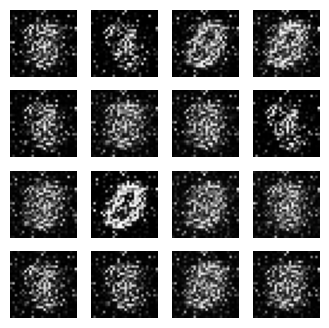

Epoch 6, D loss: 0.519, G loss: 2.316
Epoch 7, D loss: 0.543, G loss: 1.883
Epoch 8, D loss: 0.577, G loss: 1.993
Epoch 9, D loss: 0.417, G loss: 2.543
Epoch 10, D loss: 0.453, G loss: 2.397


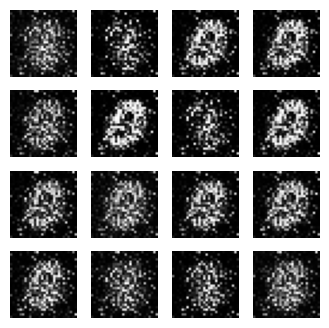

Epoch 11, D loss: 0.494, G loss: 2.278
Epoch 12, D loss: 0.374, G loss: 2.410
Epoch 13, D loss: 0.525, G loss: 2.066
Epoch 14, D loss: 0.557, G loss: 2.106
Epoch 15, D loss: 0.493, G loss: 2.315


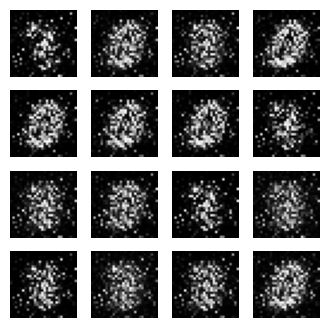

Epoch 16, D loss: 0.439, G loss: 2.442
Epoch 17, D loss: 0.434, G loss: 2.341
Epoch 18, D loss: 0.514, G loss: 2.466
Epoch 19, D loss: 0.412, G loss: 2.392
Epoch 20, D loss: 0.372, G loss: 2.725


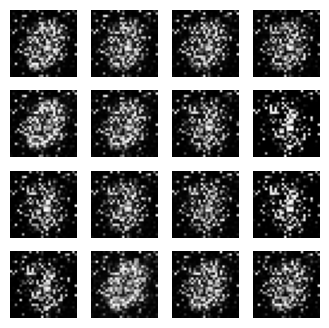

Epoch 21, D loss: 0.286, G loss: 2.930
Epoch 22, D loss: 0.277, G loss: 3.543
Epoch 23, D loss: 0.204, G loss: 3.513
Epoch 24, D loss: 0.172, G loss: 3.066
Epoch 25, D loss: 0.205, G loss: 3.420


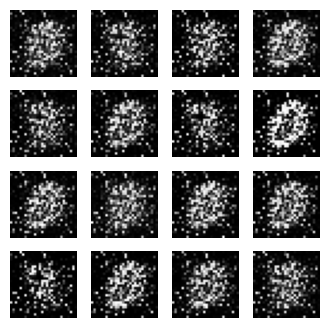

Epoch 26, D loss: 0.157, G loss: 3.298
Epoch 27, D loss: 0.206, G loss: 3.361
Epoch 28, D loss: 0.269, G loss: 2.938
Epoch 29, D loss: 0.274, G loss: 3.052
Epoch 30, D loss: 0.366, G loss: 2.768


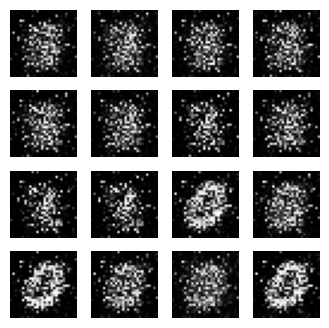

Epoch 31, D loss: 0.480, G loss: 2.588
Epoch 32, D loss: 0.455, G loss: 2.537
Epoch 33, D loss: 0.500, G loss: 2.443
Epoch 34, D loss: 0.467, G loss: 2.287
Epoch 35, D loss: 0.507, G loss: 2.355


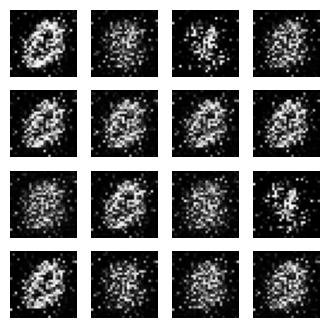

Epoch 36, D loss: 0.630, G loss: 2.311
Epoch 37, D loss: 0.522, G loss: 2.395
Epoch 38, D loss: 0.555, G loss: 2.666
Epoch 39, D loss: 0.592, G loss: 2.114
Epoch 40, D loss: 0.662, G loss: 2.161


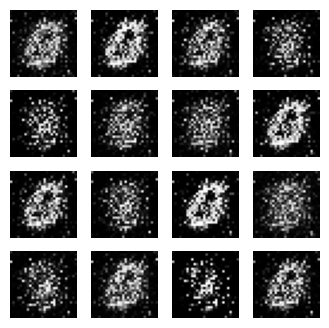

Epoch 41, D loss: 0.564, G loss: 2.024
Epoch 42, D loss: 0.493, G loss: 2.598
Epoch 43, D loss: 0.388, G loss: 2.697
Epoch 44, D loss: 0.371, G loss: 2.958
Epoch 45, D loss: 0.267, G loss: 3.424


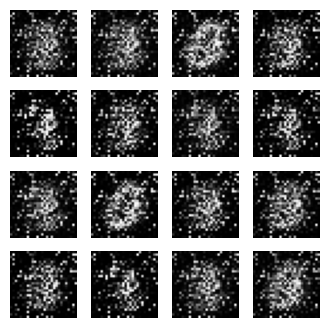

Epoch 46, D loss: 0.331, G loss: 3.122
Epoch 47, D loss: 0.247, G loss: 3.368
Epoch 48, D loss: 0.300, G loss: 2.978
Epoch 49, D loss: 0.191, G loss: 3.555
Epoch 50, D loss: 0.203, G loss: 3.594


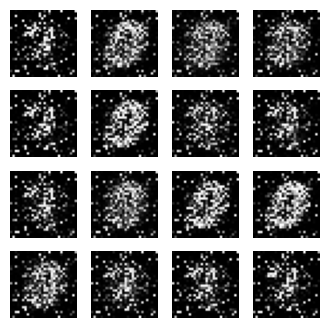

In [12]:
# Training loop
for epoch in range(1, 51):
    for real_images in train_ds:
        d_loss, g_loss = train_step(real_images)
    print(f'Epoch {epoch}, D loss: {d_loss:.3f}, G loss: {g_loss:.3f}')

    # show samples every few epochs
    if epoch % 5 == 0:
        noise = tf.random.normal([16, 100])
        imgs = G(noise).numpy()
        imgs = (imgs + 1) / 2.0
        plt.figure(figsize=(4, 4))
        for i in range(16):
            plt.subplot(4, 4, i+1)
            plt.imshow(imgs[i].squeeze(), cmap='gray')
            plt.axis("off")
        plt.show()